# Import necessary depencencies

In [7]:
import pandas as pd
import numpy as np
import os
import json
from os import listdir
import re
import sys
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import string
import pickle
import datetime
import seaborn as sns
import matplotlib.pyplot as plt


# Change path to dataset here

In [8]:
basedir = os.path.join(os.sep, "media", "tie-server", "DATA", "Jens", "Crunchbase")
#tempdir = os.getcwd()
tempdir = basedir

# Import the dataset

In [9]:
with open (os.path.join(tempdir, 'temp_data', 'articles_df'), 'rb') as fp:
    articles_df = pickle.load(fp)
articles_df.head()

,company,full_text,paragraphs
0,brightline,plus company updates(pcu)\n\n ...,new york: following is the company profile of...
1,brightline,plus company updates(pcu)\n\n ...,"""media agencies, creative agencies and publi..."
2,brightline,m2 equitybites\n\n ...,brightline is the market leader for advanced t...
3,brightline,plus company updates(pcu)\n\n ...,austin: sizmek inc. has issued the following ...
4,brightline,broadcasting and cable\n\n ...,naylor said the majority of hulu's viewing now...


# Word count
It will take about 3 mins

In [10]:
articles_df["words"] = articles_df["full_text"].apply(word_tokenize)
#ax = sns.violinplot(x="day", y="total_bill", data=tips)

In [11]:
articles_df["word_count"] = articles_df["words"].apply(len)
articles_df.sort_values(by="word_count", inplace=True, ascending=True)
articles_df.head(30000)
#print(len(articles_df))
#len_group = 
#articles_df.iloc[0:le]

,company,full_text,paragraphs,words,word_count
18441,spiceworks,globaladsource (english)\n\n ...,id 9632659 description unclas...,"[globaladsource, (, english, ), august, 9, ,, ...",45
18430,spiceworks,globaladsource (english)\n\n ...,id 9227328 description unclas...,"[globaladsource, (, english, ), june, 23, ,, 2...",45
7990,photobucket,globaladsource (english)\n\n ...,id 5038862 description cartoo...,"[globaladsource, (, english, ), july, 26, ,, 2...",45
7988,photobucket,globaladsource (english)\n\n ...,id 5040415 description man pr...,"[globaladsource, (, english, ), july, 28, ,, 2...",45
18431,spiceworks,globaladsource (english)\n\n ...,id 9152457 description unclas...,"[globaladsource, (, english, ), june, 17, ,, 2...",45
18435,spiceworks,globaladsource (english)\n\n ...,id 7349380 description unclas...,"[globaladsource, (, english, ), february, 11, ...",45
59674,videosurf,globaladsource (english)\n\n ...,id 45351734 description text ...,"[globaladsource, (, english, ), december, 10, ...",46
39857,imeem,globaladsource (english)\n\n ...,id 5503084 description car pr...,"[globaladsource, (, english, ), september, 30,...",46
8008,photobucket,globaladsource (english)\n\n ...,id 4164548 description pictur...,"[globaladsource, (, english, ), june, 9, ,, 20...",46
7997,photobucket,globaladsource (english)\n\n ...,id 4833806 description cat pr...,"[globaladsource, (, english, ), july, 7, ,, 20...",46


In [16]:
print(articles_df.loc[18441, "full_text"])
print(articles_df.loc[18430, "full_text"])



globaladsource (english)

                             august 9, 2009 sunday

unclassified



id              9632659
description     unclassified
price           $23.0 usd
media type      internet
country         united states
product         unclassified
productbrand    spiceworks
preview
order
ad detail



publication-type: web publication


                    copyright 2009 adfinitum networks, inc.
                              all rights reserved
globaladsource (english)

                            june 23, 2010 wednesday

unclassified



id              9227328
description     unclassified
price           $23.0 usd
media type      internet
country         united states
product         unclassified
productbrand    spiceworks
preview
order
ad detail



publication-type: web publication


                    copyright 2010 adfinitum networks, inc.
                              all rights reserved


/home/tie-server/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)
/home/tie-server/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


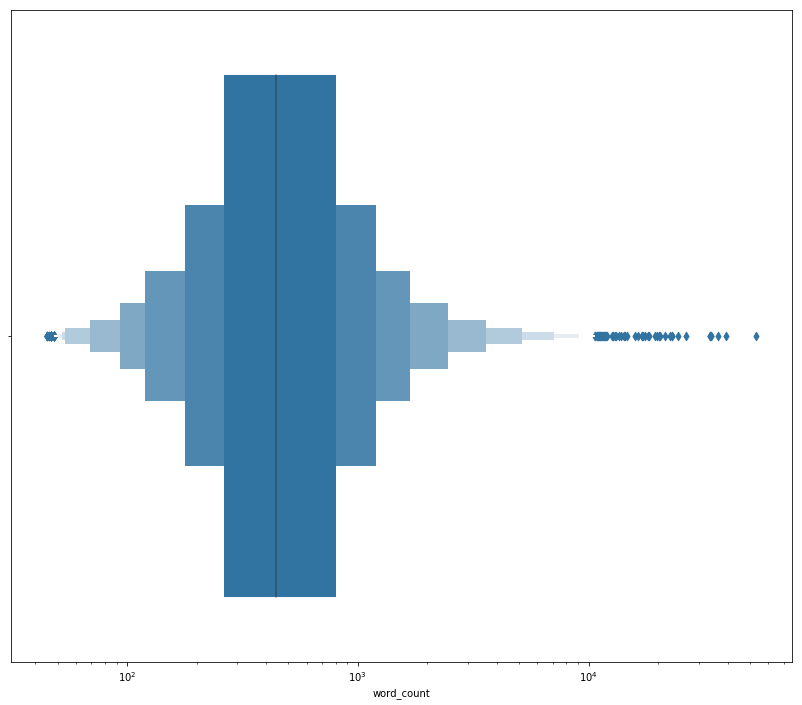

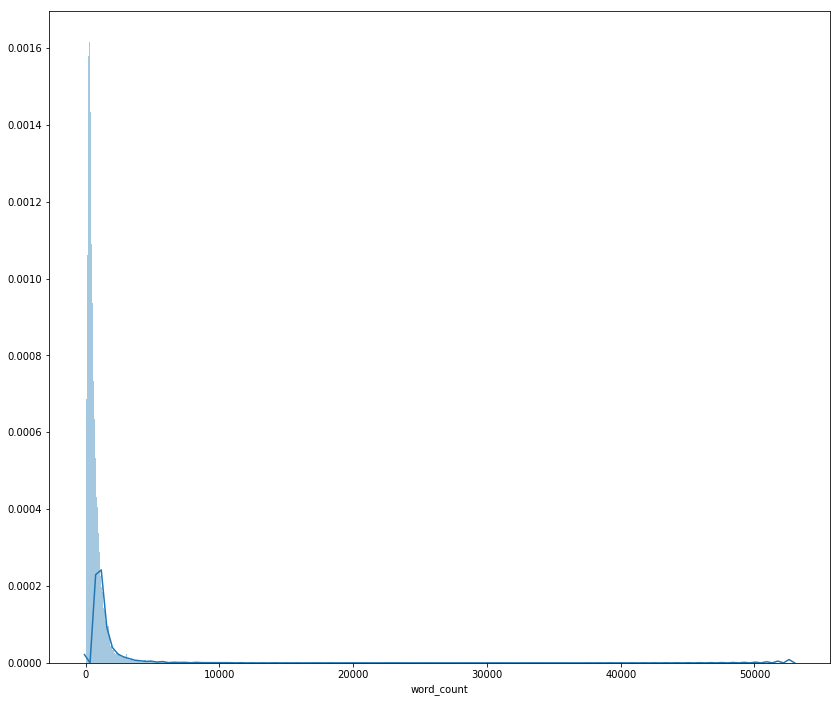

In [12]:
#ax = sns.catplot(x=articles_df.iloc[0:-1,-1], type="boxen", k_depth="trustworthy", xscale="log")
#sns.set(style="ticks")
f, ax = plt.subplots(figsize=(14, 12))
ax.set_xscale("log")
sns.lvplot(articles_df.iloc[0:-1,-1])
f.show()
f, ax = plt.subplots(figsize=(14, 12))
ax.set_xscale("linear")
sns.distplot(articles_df.iloc[0:-1,-1], bins=1000)
f.show()